In [4]:
def fit(x,y):
    w=np.random.randan(1,x.shape[1])
    w0=0

    loss=[]
    for i in range(len(x)):
        z=np.dot(w,x[i])+w0

        p= 1/(1+np.exp(-z))

        log_loss = -((y[i]*np.log(p)) + ((1-y[i])*np.log(1-p)))
        loss.append(log_loss)

    avg_loss = sum(loss)/len(x)

    w=w-lr*dl/dw

    w0= w0 - lr*dl/dw0
    print("Average loss",avg_loss)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("SpamEmail.csv")
df

,label_num,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,2.405918e-02,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,0,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,7.551698e-05,0.010306,0.023397,-0.007294,0.063543,0.081119
2,0,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-2.242872e-02,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,1,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,7.414826e-04,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,0,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,2.167316e-02,0.056718,0.006140,0.042217,0.018862,-0.007373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,0,-0.031692,0.148241,0.188167,0.042586,-0.065395,-0.032191,-0.040826,0.330095,0.014898,8.012419e-02,-0.116618,-0.010719,-0.012583,-0.057367,-0.057513
5167,0,-0.046865,0.083900,-0.059857,0.152789,0.005191,0.114154,0.418390,0.158786,0.071113,4.309074e-01,0.547246,0.002169,-0.153765,0.012520,0.003188
5168,0,-0.086257,-0.025376,-0.112771,0.301561,0.754613,-0.202125,-0.184104,0.030056,-0.001334,2.672995e-02,0.028471,-0.003212,0.046831,-0.021603,-0.025126
5169,0,-0.054057,-0.029265,0.027334,-0.036550,0.030322,-0.010576,-0.003889,0.030068,-0.039968,-1.912216e-02,0.016187,0.008314,-0.036538,-0.017858,0.001310


In [7]:
x=df.drop(['label_num'],axis=1)
x.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,-0.031489,-0.003323,-0.071238,0.047743,0.060798,0.046597,-0.069530,-0.000031,-0.037924,0.024059,-0.015085,-0.007752,-0.021617,-0.025395,0.046050
1,-0.122601,0.114176,0.460451,0.000953,0.014707,0.007610,-0.011173,-0.052478,0.040209,0.000076,0.010306,0.023397,-0.007294,0.063543,0.081119
2,-0.076681,-0.084330,-0.054658,-0.048236,-0.019999,-0.045909,-0.004712,-0.001524,0.013735,-0.022429,0.010273,-0.007458,-0.044340,-0.051093,0.025553
3,-0.075948,-0.059706,-0.025301,-0.037603,-0.001208,-0.030660,0.018873,-0.013434,-0.014981,0.000741,0.005653,0.032153,0.001884,-0.018005,-0.011060
4,-0.054680,0.033033,-0.090885,-0.047280,-0.029304,0.085893,-0.105351,-0.053915,-0.006857,0.021673,0.056718,0.006140,0.042217,0.018862,-0.007373


In [8]:
y=df['label_num']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: label_num, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test=train_test_split(x,y, test_size=0.2 ,random_state=0)

In [11]:
x_train.shape , y_train.shape

((4136, 15), (4136,))

In [12]:
x_test.shape , y_test.shape

((1035, 15), (1035,))

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model=LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
print("training accuracy:",model.score(x_train,y_train))

training accuracy: 0.9327852998065764


In [17]:
print("testing accuracy :",model.score(x_test,y_test))


testing accuracy : 0.923671497584541


In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [19]:
y_pred=model.predict(x_test)


In [20]:
confus_matrix= confusion_matrix(y_test,y_pred)
confus_matrix

array([[674,  58],
       [ 21, 282]], dtype=int64)

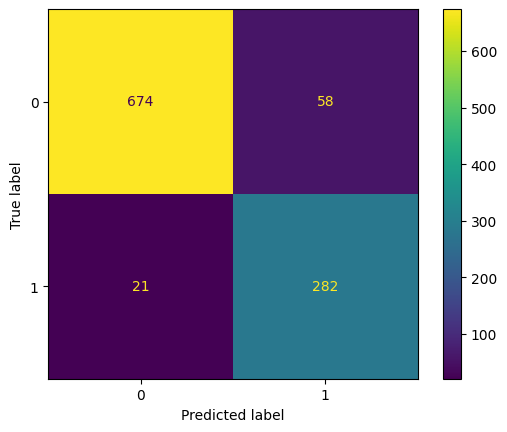

In [21]:
ConfusionMatrixDisplay(confus_matrix).plot()
plt.show()

In [22]:
np.diag(confus_matrix).sum()/confus_matrix.sum()

0.923671497584541

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(y_test,y_pred)

0.8771384136858476

In [25]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [26]:
probability=model.predict_proba(x_test)
probability

array([[0.67176997, 0.32823003],
       [0.95810144, 0.04189856],
       [0.94394003, 0.05605997],
       ...,
       [0.97650683, 0.02349317],
       [0.46120165, 0.53879835],
       [0.99657807, 0.00342193]])

In [27]:
probabilities= probability[:,1]
probabilities

array([0.32823003, 0.04189856, 0.05605997, ..., 0.02349317, 0.53879835,
       0.00342193])

In [28]:
fpr , tpr , thr = roc_curve(y_test,probabilities)


In [29]:
print(f' FPR:\n {fpr}\n\n\n')
print(f'TPR:\n{tpr}\n\n\n')
print(f'THR:\n{thr}')


 FPR:
 [0.         0.         0.         0.00136612 0.00136612 0.00273224
 0.00273224 0.00409836 0.00409836 0.00546448 0.00546448 0.0068306
 0.0068306  0.00819672 0.00819672 0.00956284 0.00956284 0.01092896
 0.01092896 0.01229508 0.01229508 0.0136612  0.0136612  0.01502732
 0.01502732 0.01639344 0.01639344 0.01775956 0.01775956 0.01775956
 0.01775956 0.01912568 0.01912568 0.0204918  0.0204918  0.02185792
 0.02185792 0.02322404 0.02322404 0.02459016 0.02459016 0.02595628
 0.02595628 0.0273224  0.0273224  0.02868852 0.02868852 0.03005464
 0.03005464 0.03142077 0.03142077 0.03278689 0.03278689 0.03415301
 0.03415301 0.03551913 0.03551913 0.03688525 0.03688525 0.03825137
 0.03825137 0.03825137 0.03961749 0.03961749 0.04098361 0.04098361
 0.04234973 0.04234973 0.04644809 0.04644809 0.04781421 0.04781421
 0.04918033 0.04918033 0.04918033 0.04918033 0.05191257 0.05191257
 0.05464481 0.05464481 0.05601093 0.05601093 0.05737705 0.05737705
 0.06010929 0.06010929 0.06147541 0.06147541 0.06420765 

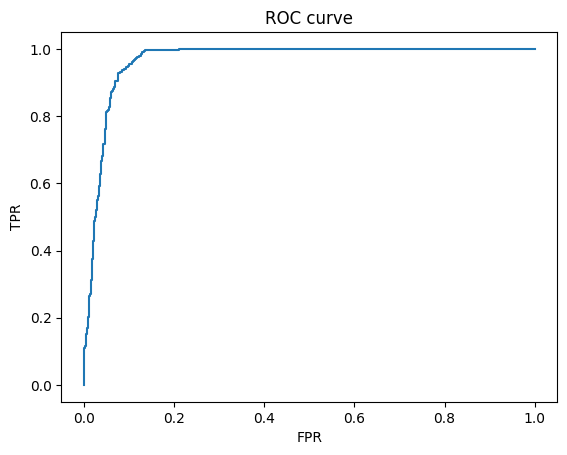

In [30]:
plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [31]:
roc_auc_score(y_test,probabilities)

0.9661265306858555

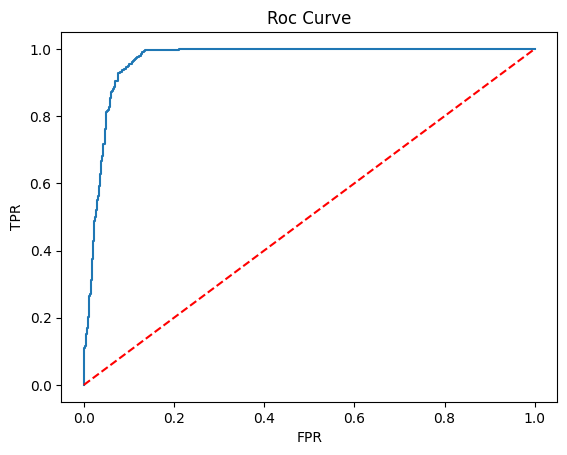

In [32]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red')
plt.title('Roc Curve')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [33]:
auc(fpr,tpr)

0.9661265306858555